# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. *Read the abstract. What is this paper about?*

  This paper is about data tidying and how to evaluate and clean datasets when they are in a specific structure.


  2. *Read the introduction. What is the "tidy data standard" intended to accomplish?*

  It is intended to be a uniform way to explore and analyze data without starting from scratch with your data each time. This allows more people time to deal with the data analysis rather than nitty gritty data processing.


  3. *Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."*

  The first sentence means that all data has the same general structure (like a family does) but just like every family has their own drama and their own issues, every data will need its own unique care with its own unique cleaning processes. The second quote means that its easy to read and understand what the inputs to the data are, but drawing conclusiosn from that is hard work,and someitmes cannot be done.

  4. *Read Section 2.2. How does Wickham define values, variables, and observations?*

    **Values:** This is what makes up a dataset, either made up of quantitative values such as numbers or qualitiative values such as strings. Every value belongs to a variable and an observation.

    **Variables:** It contains all values that measure a similiar attribute across units. Some examples include height, temperature, and duration.  

    **Observations:** It contains all values measured on the same unit across attributes, such as a person, a day, or a race.

  5. *How is "Tidy Data" defined in section 2.3?*

  Tidy data is defined as a standard way of mapping the meaning of a dataset to a structure. A tidy data set is defined as a data st where each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

  6. *Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?*

  **The 5 most common problems with messy data are:**

  a. Columns headers are values are not variable names

  b. Multiple variables are stored in one column

  c. Variables are stored in both rows and columns

  d. Multiple types of observational units are stored in the same table

  e. A single observational unit is stored in multiple tables

  **The data in Table 4 is messy because:**

  This is hard to read because it is not clear the the number listed is the frequency. The columns need to be turned into rows.

  **What is Melting?**

  Melting is when the data is turned from columns into rows by parameterizing a list of columns that are already variables. The other columns are convertred into two new variables: 'column' and 'value'. This results in a 'molten' datatset

  7. *Why, specifically, is table 11 messy but table 12 tidy and "molten"?*

Table 11 is messy because there is a column for each possible day of the month, which result in a very large number of NA values, which would need ot be cleaned. Table 12 is molten because missing values are dropped to conserve space and the illogical columns were converted into rows to help save space.

  8. *Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?*

The 'chicken-and-egg' problem is the paradox where the tidy data is only as useful as the tools that work with it and the tools that work on it are more effective on tidy data.

Wickam hopes for people to continue to work together to build a solution, rather than consistently just doing what others before them have already done. He wants to develop more frameworks to make other data related tasks easier as well.


**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

    We needed to remove the comma from the Price column so that the column can be converted to integers. There are no NAs
    in the Price column. 
    
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.

    The 'Type' variable had many nas, which I removed to clean the column. I also stripped the white space from before 
    and after the word. 

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.


4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

airbnb = pd.read_csv("./data/airbnb_hw.csv")

# need to remove commas from string numbers so it can be converted to an int 
airbnb['Price'] = airbnb['Price'].str.replace(',', '', regex=True)
airbnb['Price'] = airbnb['Price'].astype(int)

# discover if we need to use imputation to alter the na values  
subset_with_missing_price = airbnb[airbnb['Price'].isna()]
#print(subset_with_missing_price)
# since there are no na values, this can be ignored. 


airbnb.head()

/home/wfn7ad/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [2]:
# Categorical variable: For the ./data/sharks.csv data covered in the lecture, clean the 
# "Type" variable as well as you can, and explain the choices you make.

sharks = pd.read_csv("./data/sharks.csv", low_memory=False)

# Remove leading and trailing whitespace
sharks['Type'] = sharks['Type'].str.lower().str.strip()

#count the number of nas
na_count = sharks['Type'].isna().sum()
print(na_count)

#I am hesitant to just drop the na variables; just because we don't know the type of attack doesn't mean it 
#cant offer important info; just replacing it with a dummy variable called 'Unknown'
sharks['Type'].fillna('unknown', inplace=True)


sharks

5


,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,6457,ND.0005,Before 1903,0.0,unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6458,6458,ND.0004,Before 1903,0.0,unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6459,6459,ND.0003,1900-1905,0.0,unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6460,6460,ND.0002,1883-1889,0.0,unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Dummy variable: For the pretrial data covered in the lecture, 
# clean the WhetherDefendantWasReleasedPretrial variable as well as you can, and, 
# in particular, replace missing values with np.nan.

url = 'October 2017 Cohort_Virginia Pretrial Data Project_Deidentified FINAL Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you

df["WhetherDefendantWasReleasedPretrial"] = pd.to_numeric(df["WhetherDefendantWasReleasedPretrial"], errors='coerce')

df.loc[~df['WhetherDefendantWasReleasedPretrial'].isin([0, 1]), 'WhetherDefendantWasReleasedPretrial'] = np.nan

# Replace missing values in column with np.nan
df['WhetherDefendantWasReleasedPretrial'].fillna(np.nan, inplace=True)

# I changed all the values of 9 into nans because this is meant to be a binary variable and I dont want the next person who
# uses the data to mistakenly think it is a valid option 

In [4]:
df['WhetherDefendantWasReleasedPretrial']

0        NaN
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
22981    1.0
22982    1.0
22983    1.0
22984    1.0
22985    1.0
Name: WhetherDefendantWasReleasedPretrial, Length: 22986, dtype: float64

In [5]:
# Missing values, not at random: For the pretrial data covered in the lecture,
#     clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, 
#     and explain the choices you make.(Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)


# sentence type is  measured as the sentence type for all charges in the October 2017 contact event at conviction.
# according to code book, must be 0, 1 2, 4, or 9 

# imposed one is Measured as the total imposed sentence term for any charges in the October 2017 contact event
# resulting in a conviction (in months)


final = df[["SentenceTypeAllChargesAtConvictionInContactEvent", "ImposedSentenceAllChargeInContactEvent"]]

na_count = df["ImposedSentenceAllChargeInContactEvent"].isna().sum()

print(na_count)
final

0


,SentenceTypeAllChargesAtConvictionInContactEvent,ImposedSentenceAllChargeInContactEvent
0,9,
1,0,60
2,1,12
3,1,0.985626283
4,4,
...,...,...
22981,4,
22982,9,
22983,4,
22984,4,


count    22986.000000
mean         1.901549
std          1.951090
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max          9.000000
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: float64 

0 



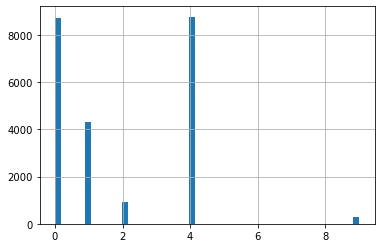

In [6]:
# make histograms of both variables mentioned to try to find out where the issue might lie 
var1 = "SentenceTypeAllChargesAtConvictionInContactEvent"

df[var1] = pd.to_numeric(df[var1], errors='coerce')

print(df[var1].describe(), '\n')
df[var1].hist(bins=50)

df['sent_type_all_NA'] = df[var1].isnull() 

print(sum(df['sent_type_all_NA']), '\n')

count    13933.000000
mean        19.899671
std         63.571627
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max       2208.000000
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64 

9053 



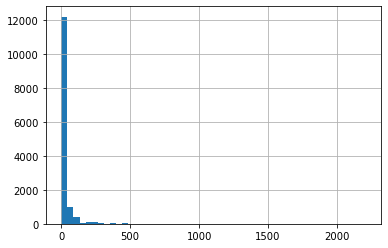

In [7]:
var2 = "ImposedSentenceAllChargeInContactEvent"

df[var2] = pd.to_numeric(df[var2], errors='coerce')

print(df[var2].describe(), '\n')
df[var2].hist(bins=50)

df['imp_sent_all_NA'] = df[var2].isnull() 

print(sum(df['imp_sent_all_NA']), '\n')

# this tells me that this is definitely the variable with the issue, so now I will 

In [8]:
grouped = df.groupby(["SentenceTypeAllChargesAtConvictionInContactEvent"]).size().reset_index(name='count')
grouped

,SentenceTypeAllChargesAtConvictionInContactEvent,count
0,0,8720
1,1,4299
2,2,914
3,4,8779
4,9,274


In [9]:
# Group the DataFrame by both columns and sum the 'nums' column
grouped_with_imposed = df.groupby(["SentenceTypeAllChargesAtConvictionInContactEvent", "ImposedSentenceAllChargeInContactEvent"]).size().reset_index(name='count_imposed')
grouped_with_imposed

,SentenceTypeAllChargesAtConvictionInContactEvent,ImposedSentenceAllChargeInContactEvent,count_imposed
0,0,0.000000,4953
1,0,0.065708,3
2,0,0.098563,2
3,0,0.131417,4
4,0,0.164271,26
...,...,...,...
679,2,1200.000000,1
680,2,1500.000000,1
681,2,1752.000000,1
682,2,1980.000000,1


In [10]:
# still not sure whats going on, going to keep trying to find out whats going on. I suspect that there are only 
# imposed sentence charges for sentence type 1 and 2 ? 
sent_type_0 = df[df["SentenceTypeAllChargesAtConvictionInContactEvent"]==0]
sent_type_1 = df[df["SentenceTypeAllChargesAtConvictionInContactEvent"]==1]
sent_type_2 = df[df["SentenceTypeAllChargesAtConvictionInContactEvent"]==2]
sent_type_4 = df[df["SentenceTypeAllChargesAtConvictionInContactEvent"]==4]
sent_type_9 = df[df["SentenceTypeAllChargesAtConvictionInContactEvent"]==9]

print("type 0", sent_type_0["ImposedSentenceAllChargeInContactEvent"])
print("type 1", sent_type_1["ImposedSentenceAllChargeInContactEvent"])
print("type 2", sent_type_2["ImposedSentenceAllChargeInContactEvent"])
print("type 4", sent_type_4["ImposedSentenceAllChargeInContactEvent"])
print("type 9", sent_type_9["ImposedSentenceAllChargeInContactEvent"])

# AHA! the issue is that it does not exist for 4 and 9 ... why? 

type 0 1        60.000000
5        12.000000
7         6.000000
10        5.913758
17       12.000000
           ...    
22959    12.000000
22968     0.000000
22973     3.000000
22974    24.000000
22975    24.000000
Name: ImposedSentenceAllChargeInContactEvent, Length: 8720, dtype: float64
type 1 2        12.000000
3         0.985626
6        36.000000
8        24.000000
9        12.000000
           ...    
22772    12.000000
22782     6.000000
22796     2.000000
22921     0.985626
22964    12.000000
Name: ImposedSentenceAllChargeInContactEvent, Length: 4299, dtype: float64
type 2 28        60.000000
48       120.000000
53        60.000000
80        60.000000
91       120.000000
            ...    
17615    108.000000
17635    132.000000
17684    116.000000
17696     19.513347
22896     60.000000
Name: ImposedSentenceAllChargeInContactEvent, Length: 914, dtype: float64
type 4 4       NaN
11      NaN
12      NaN
15      NaN
16      NaN
         ..
22980   NaN
22981   NaN
22983   NaN
22

In [11]:
# i think the best way to clean this would be to impute it with a dummy variable 
# Replace "ImposedSentenceAllChargeInContactEvent" with "not_applicable" where the condition is met
df.loc[df["SentenceTypeAllChargesAtConvictionInContactEvent"].isin([4]), "ImposedSentenceAllChargeInContactEvent"] = "no time served"
df.loc[df["SentenceTypeAllChargesAtConvictionInContactEvent"].isin([4]), "ImposedSentenceAllChargeInContactEvent"] = "not applicable"

In [12]:
# doing the same thing as above now to check that the variable changes 
sent_type_0 = df[df["SentenceTypeAllChargesAtConvictionInContactEvent"]==0]
sent_type_1 = df[df["SentenceTypeAllChargesAtConvictionInContactEvent"]==1]
sent_type_2 = df[df["SentenceTypeAllChargesAtConvictionInContactEvent"]==2]
sent_type_4 = df[df["SentenceTypeAllChargesAtConvictionInContactEvent"]==4]
sent_type_9 = df[df["SentenceTypeAllChargesAtConvictionInContactEvent"]==9]

print("type 0", sent_type_0["ImposedSentenceAllChargeInContactEvent"])
print("type 1", sent_type_1["ImposedSentenceAllChargeInContactEvent"])
print("type 2", sent_type_2["ImposedSentenceAllChargeInContactEvent"])
print("type 4", sent_type_4["ImposedSentenceAllChargeInContactEvent"])
print("type 9", sent_type_9["ImposedSentenceAllChargeInContactEvent"])

type 0 1            60.0
5            12.0
7             6.0
10       5.913758
17           12.0
           ...   
22959        12.0
22968         0.0
22973         3.0
22974        24.0
22975        24.0
Name: ImposedSentenceAllChargeInContactEvent, Length: 8720, dtype: object
type 1 2            12.0
3        0.985626
6            36.0
8            24.0
9            12.0
           ...   
22772        12.0
22782         6.0
22796         2.0
22921    0.985626
22964        12.0
Name: ImposedSentenceAllChargeInContactEvent, Length: 4299, dtype: object
type 2 28            60.0
48           120.0
53            60.0
80            60.0
91           120.0
           ...    
17615        108.0
17635        132.0
17684        116.0
17696    19.513347
22896         60.0
Name: ImposedSentenceAllChargeInContactEvent, Length: 914, dtype: object
type 4 4        not_applicable
11       not_applicable
12       not_applicable
15       not_applicable
16       not_applicable
              ...      
22

In [13]:
# Through this cleaning I learned the reason that this variable was filled with NANs and then because of that I filled the dataframe
# with not_applicable dummy variable for instances where the sentence type variable was 4 and 9. When the type was 4, which means they were 
# probably dismissed, I changed the variable to "no time", and for cases of 9 where the reason is unknown, i changed it to "not applicable"
# This is so the next person who uses the data can immediately see the issues with it and deal with those variables however they see fit. 

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [14]:
#What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data. 

dimensions = airbnb.shape
num_observations = dimensions[0]
data_types = airbnb.dtypes
first_few_rows = airbnb.head()

print("The dimensions of the data: ", dimensions)
print("The number of observations in the data: ", num_observations)
print("The types of the data: ", data_types)
airbnb.head()

The dimensions of the data:  (30478, 13)
The number of observations in the data:  30478
The types of the data:  Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                           int64
Review Scores Rating          float64
dtype: object


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [15]:
# Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? 
# For which kinds of properties are private rooms more common than renting the entire property?

cross_tab = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
print(cross_tab)

# The properties were renting a private room is more common than renting the entire property are: 
# Bed&Breakfast, Dorm, House, Hut, Other, Tent, Castle, Chalet,  Townhouse, and Treehouse 

# What I notice as a pattern is that renting private rooms is more popular for several options. 
# Renting a shared room is the least common option, which coincides with the expectation. 


Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

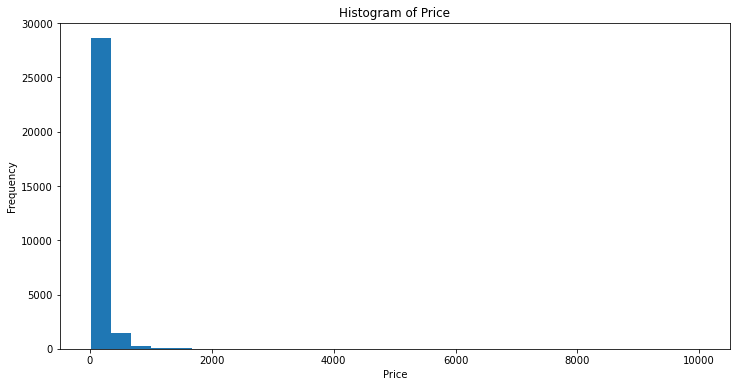

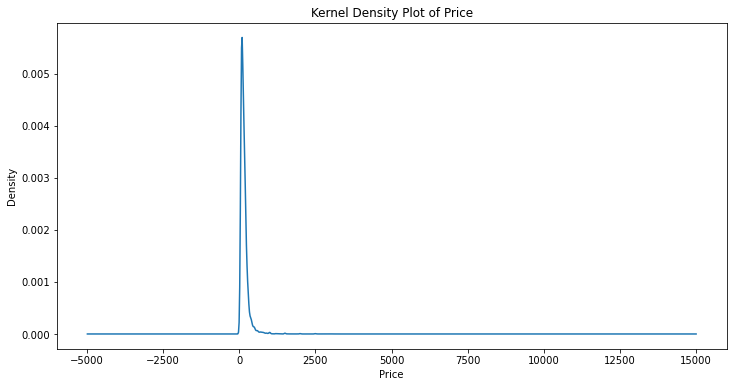

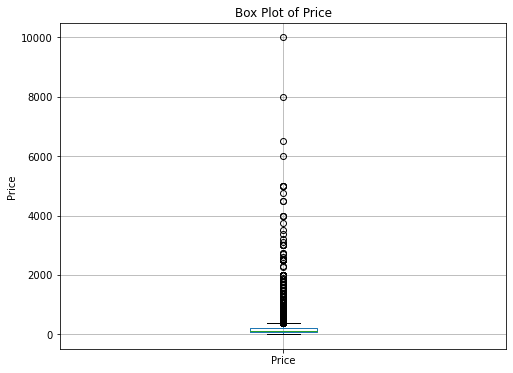

Statistical Description of Price:
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


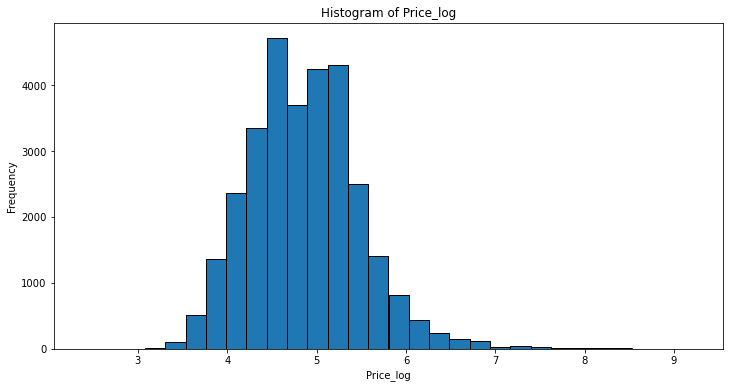

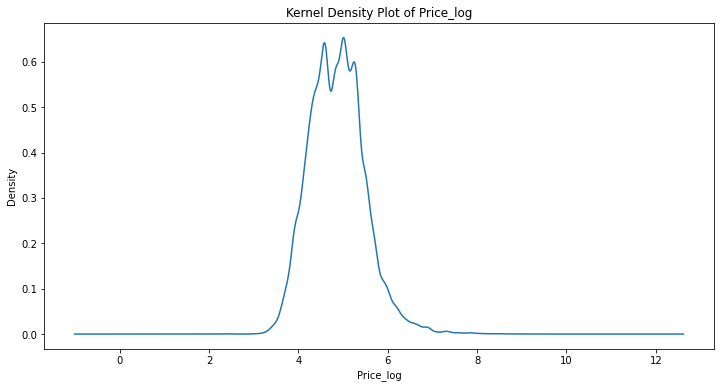

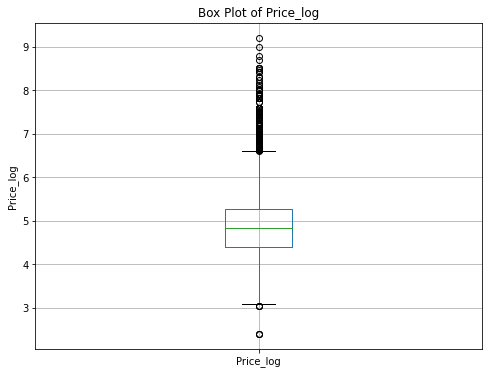

Statistical Description of Price_log:
count    30478.000000
mean         4.869699
std          0.622704
min          2.397895
25%          4.394449
50%          4.836282
75%          5.278115
max          9.210440
Name: Price_log, dtype: float64


In [16]:
# For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. 

# Histogram
plt.figure(figsize=(12, 6))
airbnb['Price'].plot.hist(bins=30)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(12, 6))
airbnb['Price'].plot.density()
plt.title('Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
airbnb.boxplot(column='Price')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

# Statistical Description
price_description = airbnb['Price'].describe()
print("Statistical Description of Price:")
print(price_description)

#Are the data badly scaled? Are there many outliers? 
# The data is very poorly scaled, majority of the data is very heavily concentrated in the same place. 
# It is very hard to make any meaningful judgements about this plot without first trying to normalize it. 

#Use log to transform price into a new variable, price_log, and take these steps again.
airbnb['Price_log'] = np.log1p(airbnb['Price']) 

# Histogram
plt.figure(figsize=(12, 6))
airbnb['Price_log'].plot.hist(bins=30, edgecolor='k')
plt.title('Histogram of Price_log')
plt.xlabel('Price_log')
plt.ylabel('Frequency')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(12, 6))
airbnb['Price_log'].plot.density()
plt.title('Kernel Density Plot of Price_log')
plt.xlabel('Price_log')
plt.ylabel('Density')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
airbnb.boxplot(column='Price_log')
plt.title('Box Plot of Price_log')
plt.ylabel('Price_log')
plt.show()

# Statistical Description
price_log_description = airbnb['Price_log'].describe()
print("Statistical Description of Price_log:")
print(price_log_description)

# After normalizing the data it is much more readable and it brought comparability to the the dataset. This helped because
# it changed the values into levels or growth rates and shrunk large values. 


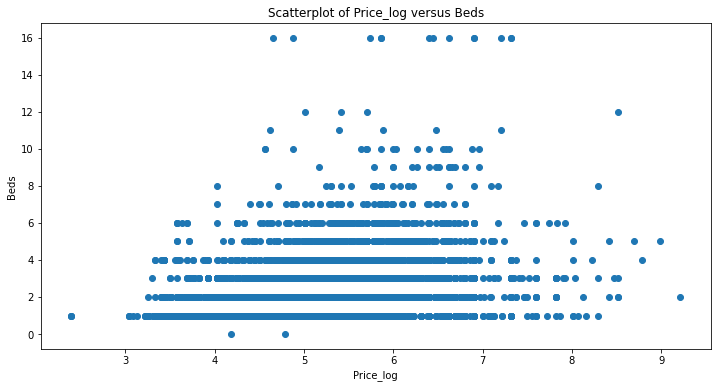

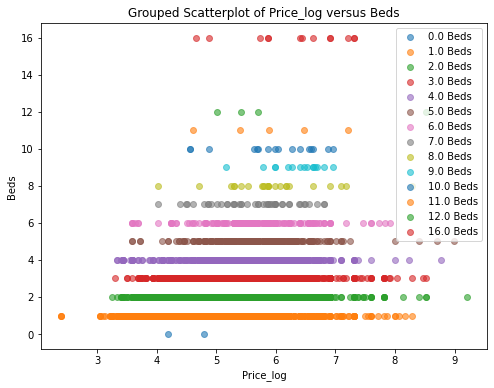

In [17]:
# Make a scatterplot of price_log and Beds. Describe what you see. 
# Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. 
# Describe any patterns you see in the average price and standard deviation in prices.

x = airbnb['Price_log']
y = airbnb['Beds']

# Scatterplot 
plt.figure(figsize=(12, 6))
plt.scatter(x, y)
plt.title('Scatterplot of Price_log versus Beds')
plt.xlabel('Price_log')
plt.ylabel('Beds')
plt.show()

# This scatterplot is slightly difficult to read, it shows that there is not a clear linear relationship between 
# price and beds. The spread of the prices is much more noticable in the listings with fewer beds. Also, most listings 
# seem to have a fewer number of beds, but in general most listings have more beds. 

# using groupby 
# Grouped Scatterplot of Price_log versus Beds
fig, ax = plt.subplots(figsize=(8, 6))

for bed_count, group_data in airbnb.groupby('Beds'):
    ax.scatter(group_data['Price_log'], group_data['Beds'], label=f'{bed_count} Beds', alpha=0.6)

ax.set_title('Grouped Scatterplot of Price_log versus Beds')
ax.set_xlabel('Price_log')
ax.set_ylabel('Beds')
ax.legend()
plt.show()



# DESCRIBE WHAT IM SEEING IN TERMS OF AVERAGE PRICE AND STANDARD DEVIATION OF PRICES FROM THE SCATTER PLOTS 


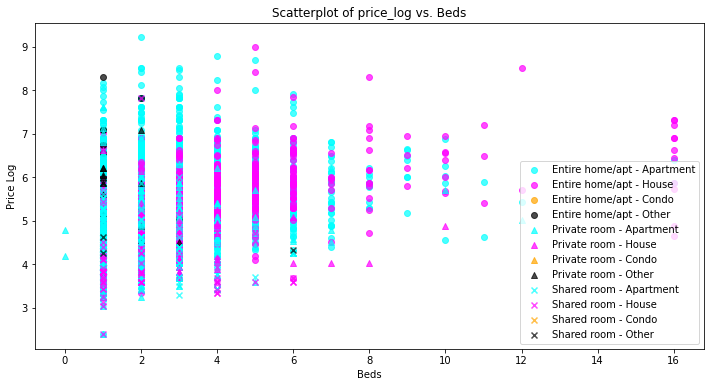

Price Statistics by Room Type and Property Type:
          Room Type    Property Type  Mean Price  Price Std Deviation
0   Entire home/apt        Apartment  213.224839           218.097834
1   Entire home/apt  Bed & Breakfast  184.538462           119.814172
2   Entire home/apt             Boat  158.428571            51.110524
3   Entire home/apt         Bungalow  150.750000            46.464144
4   Entire home/apt            Cabin  250.000000                  NaN
5   Entire home/apt        Camper/RV  114.333333           107.685963
6   Entire home/apt      Condominium  304.861111           266.197497
7   Entire home/apt             Dorm   44.250000            24.060687
8   Entire home/apt            House  297.263298           468.409428
9   Entire home/apt       Lighthouse   39.000000                  NaN
10  Entire home/apt             Loft  330.510204           321.519721
11  Entire home/apt            Other  843.428571          1133.062271
12  Entire home/apt        Townhouse  280

In [18]:
# Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. 
# What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. 
# Which Room Type and Property Type have the highest prices on average? 
# Which have the highest standard deviation? Does the mean or median appear to be a more reliable 
# estimate of central tendency, and explain why?

# Create a scatterplot with color differentiation by Room Type and Property Type
room_type_markers = {'Entire home/apt': 'o', 'Private room': '^', 'Shared room': 'x'}

property_type_colors = {'Apartment': 'cyan', 'House': 'magenta', 'Condo': 'orange', 'Other': 'black'}

plt.figure(figsize=(12, 6))

for room_type, marker in room_type_markers.items():
    for prop_type, prop_color in property_type_colors.items():
        subset = airbnb[(airbnb['Room Type'] == room_type) & (airbnb['Property Type'] == prop_type)]
        plt.scatter(subset['Beds'], subset['Price_log'], label=f'{room_type} - {prop_type}', c=prop_color, marker=marker, alpha=0.7)

# Set axis labels and a legend
plt.xlabel('Beds')
plt.ylabel('Price Log')
plt.legend()
plt.title('Scatterplot of price_log vs. Beds')
plt.show()

# Compute descriptions of Price conditional on Room Type and Property Type
grouped_stats = airbnb.groupby(['Room Type', 'Property Type'])['Price'].agg(['mean', 'std']).reset_index()
grouped_stats.columns = ['Room Type', 'Property Type', 'Mean Price', 'Price Std Deviation']

# Find the Room Type and Property Type with the highest average price
highest_mean_price = grouped_stats[grouped_stats['Mean Price'] == grouped_stats['Mean Price'].max()]

# Find the Room Type and Property Type with the highest standard deviation
highest_std_deviation = grouped_stats[grouped_stats['Price Std Deviation'] == grouped_stats['Price Std Deviation'].max()]

# Print the statistics
print("Price Statistics by Room Type and Property Type:")
print(grouped_stats)
print("\nRoom Type and Property Type with Highest Average Price:")
print(highest_mean_price)
print("\nRoom Type and Property Type with Highest Standard Deviation:")
print(highest_std_deviation)

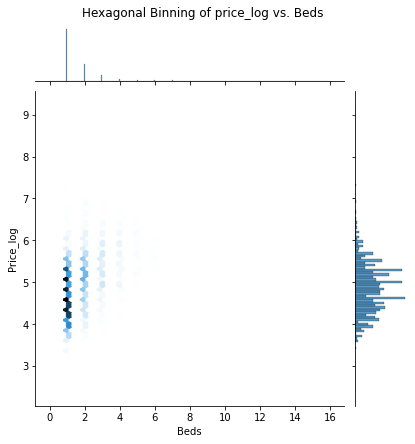

In [19]:
# We've looked a bit at this price_log and Beds scatterplot. 
# Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? 
# How does it affect the way you think about the plots in 5 and 6?


import seaborn as sns

# Create a jointplot with kind='hex'
sns.jointplot(data=airbnb, x='Beds', y='Price_log', kind='hex')

# Set axis labels and a title
plt.xlabel('Beds')
plt.ylabel('Price Log')
plt.suptitle('Hexagonal Binning of price_log vs. Beds', y=1.02)

# Show the plot
plt.show()

# How does this affect the way? idk ? 




**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?       
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.